In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from vbgmm import VariationalGaussianMixture,\
                  cluster_number_selection_by_kl

/home/lab/hideaki/.pyenv/versions/anaconda3-4.1.0/envs/ubuntu-cpu/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


## make dataset

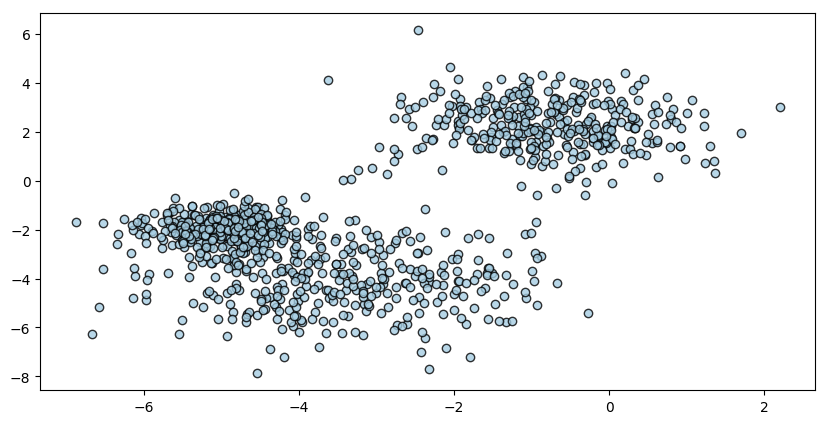

In [2]:
N = 1000
D = 2
K = 3
x, _ = make_blobs(n_samples=N, n_features=D, centers=K,
                  cluster_std=[1.0, 0.5, 1.2], center_box=(-5, 5),
                  random_state=1)

plt.figure(figsize=(10,5), dpi=100)
plt.scatter(x[:,0], x[:,1], c=plt.cm.Paired(0), edgecolor='black', alpha=.8)
plt.show()

## Gaussian Mixture estimation using the optimal cluster number
- The estimation sometimes fails because of initial values

In [5]:
vgm = VariationalGaussianMixture(x, K)
vgm.fit(max_epochs=50, print_diff=False)

# iterations: 50
w: [0.33432836 0.34626866 0.31940299]
means: [[-0.81561662  2.2340552 ]
 [-4.96749769 -1.99768534]
 [-3.42744558 -4.11403449]]
covs: [[[1.02221864 0.02107753]
  [0.02107753 1.20869279]]

 [[0.32344291 0.04188494]
  [0.04188494 0.34261169]]

 [[1.61263561 0.09055592]
  [0.09055592 1.71136749]]]


## plot with ellipses
$D_M = \sqrt{(\boldsymbol{x}-\boldsymbol{\mu})^T\Sigma^{-1}(\boldsymbol{x}-\boldsymbol{\mu})} = 1$

$\Sigma = VWV^T$

$V = [\boldsymbol{v}_1, \boldsymbol{v}_2]$,
$W = \left[
\begin{array}{cc}
  \lambda_1 & 0\\
  0 & \lambda_2
\end{array}
\right]
$

major axis $= \sqrt{\lambda_1}\boldsymbol{v}_1$

minor axis $= \sqrt{\lambda_2}\boldsymbol{v}_2$

KL div: 2548.742594840007


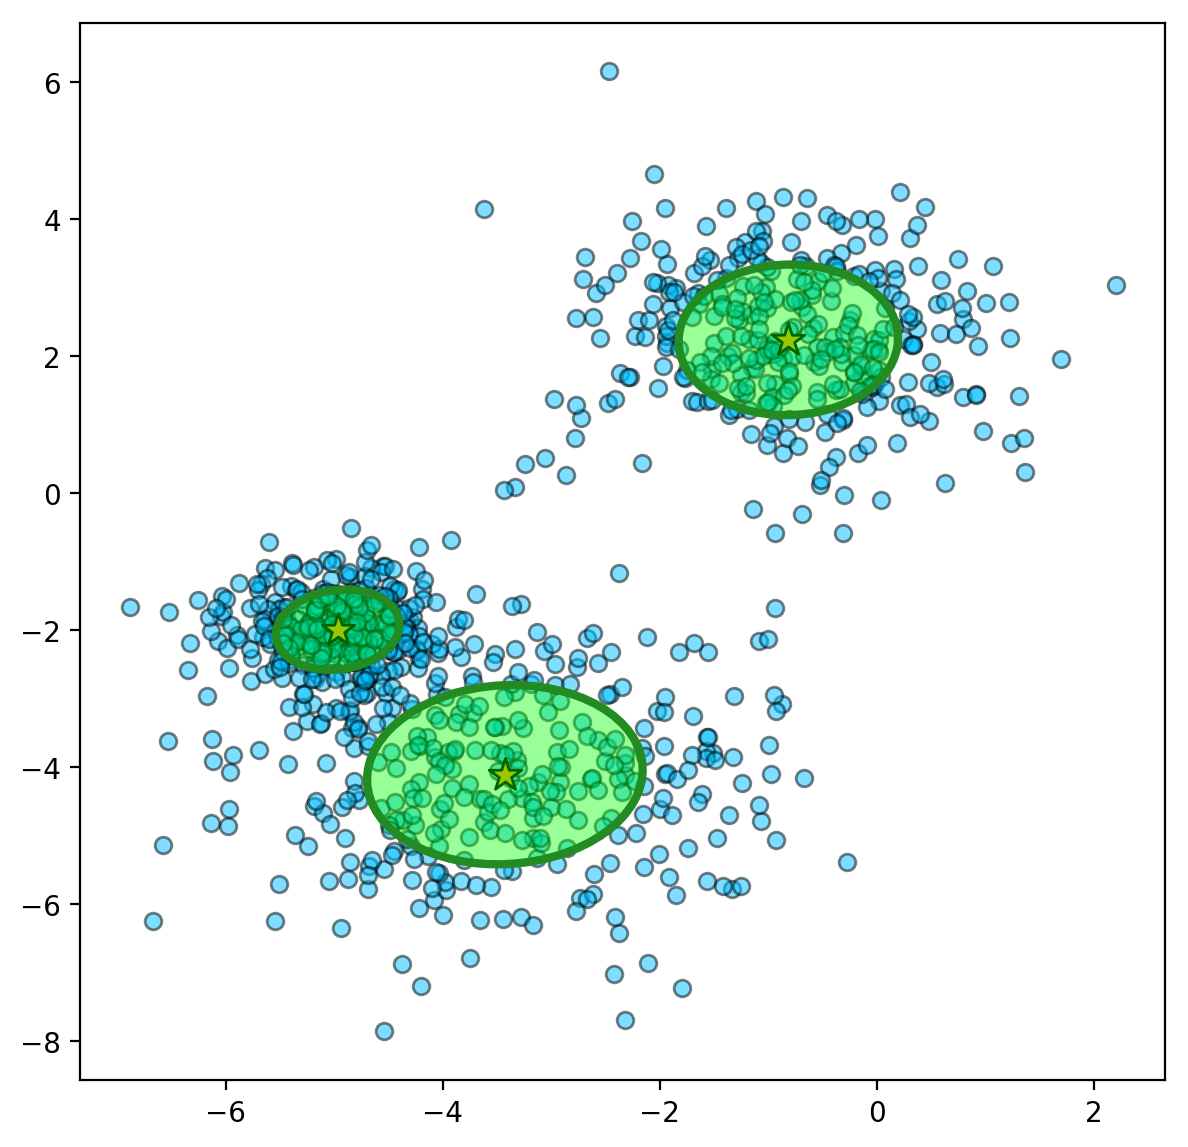

In [6]:
print(f'KL div: {vgm.kl_divergence()}')
vgm.plot_with_ellipses()

## automatic cluster number selection by kl divergence

======= 1 =========
# iterations: 6
w: [1.]
means: [[-3.08444947 -1.25797322]]
covs: [[[3.93801735 3.4791716 ]
  [3.4791716  7.90246682]]]


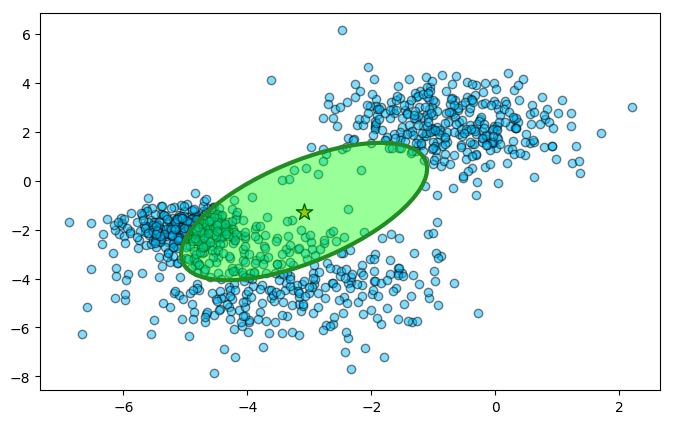

======= 2 =========
# iterations: 31
w: [0.33333333 0.66666667]
means: [[-0.80600583  2.2373655 ]
 [-4.22828306 -3.00752118]]
covs: [[[ 1.00017368e+00  1.23599593e-03]
  [ 1.23599593e-03  1.21883183e+00]]

 [[ 1.49675418e+00 -7.67316836e-01]
  [-7.67316836e-01  2.09187347e+00]]]


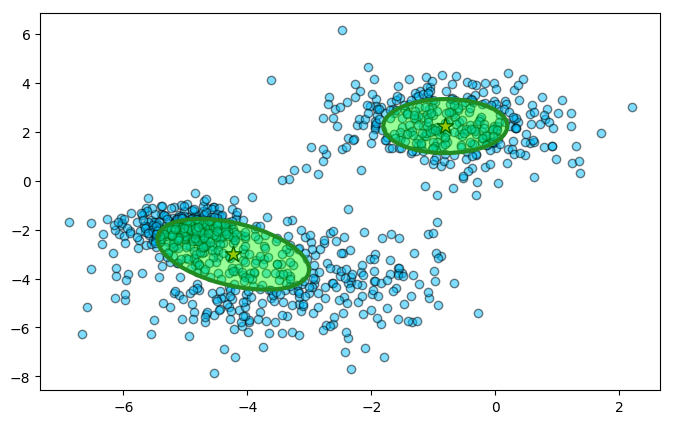

======= 3 =========
# iterations: 50
w: [0.35714286 0.30853175 0.3343254 ]
means: [[-4.95586504 -2.01344448]
 [-3.38530906 -4.16476287]
 [-0.81738371  2.22756595]]
covs: [[[0.33248731 0.03790458]
  [0.03790458 0.35802596]]

 [[1.59350336 0.15450651]
  [0.15450651 1.6517502 ]]

 [[1.02678578 0.02755941]
  [0.02755941 1.21121014]]]


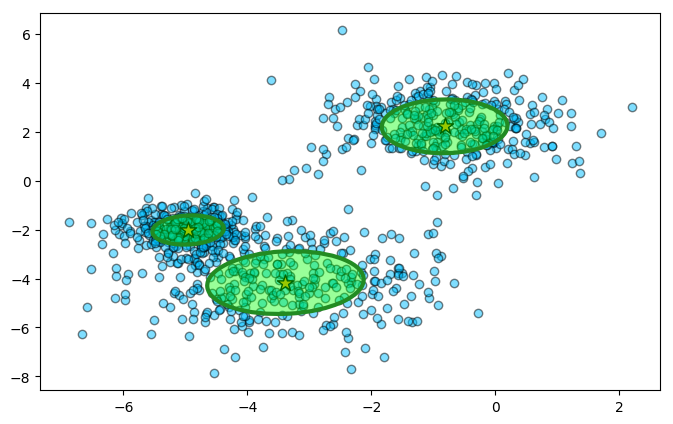

======= 4 =========
# iterations: 50
w: [0.32874016 0.46358268 0.19291339 0.01476378]
means: [[-0.80319651  2.23959479]
 [-4.76836829 -2.40046276]
 [-2.8815924  -4.46606395]
 [-4.10846205 -2.37126412]]
covs: [[[ 1.00266397e+00  4.95151141e-03]
  [ 4.95151141e-03  1.18894038e+00]]

 [[ 5.23286583e-01 -1.69702147e-01]
  [-1.69702147e-01  9.67537322e-01]]

 [[ 1.38528242e+00  5.30690816e-01]
  [ 5.30690816e-01  1.78649883e+00]]

 [[ 3.23610745e+00  3.55626877e+00]
  [ 3.55626877e+00  7.20368116e+00]]]


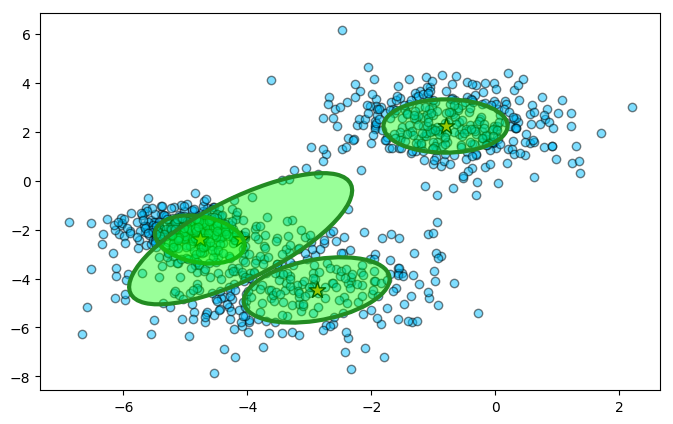

======= 5 =========
# iterations: 44
w: [0.30335968 0.33003953 0.00592885 0.35573123 0.00494071]
means: [[-3.38323368 -4.18201193]
 [-0.80718738  2.23431477]
 [-3.34575165 -1.127576  ]
 [-4.9537418  -2.01390812]
 [-3.37429933 -1.2419469 ]]
covs: [[[1.58573235 0.15488881]
  [0.15488881 1.63587177]]

 [[1.00910983 0.01869692]
  [0.01869692 1.19015483]]

 [[3.44318356 3.2973983 ]
  [3.2973983  9.18401597]]

 [[0.3313633  0.03758944]
  [0.03758944 0.35789984]]

 [[3.70607241 3.40733513]
  [3.40733513 8.85888902]]]


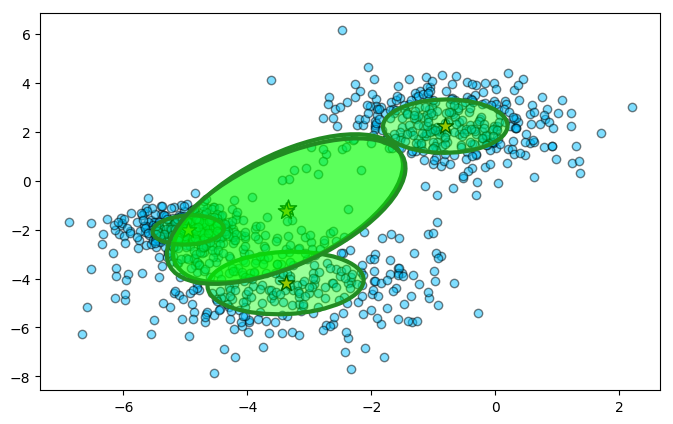

======= 6 =========
# iterations: 50
w: [0.01476378 0.00492126 0.35433071 0.00590551 0.32677165 0.29330709]
means: [[-3.50075708 -2.50131072]
 [-3.27019248 -1.30675261]
 [-4.9516138  -2.01434122]
 [-3.11976366 -0.9966454 ]
 [-0.79881463  2.24076354]
 [-3.37502459 -4.19506503]]
covs: [[[2.65113612e+00 2.09155137e+00]
  [2.09155137e+00 6.80206197e+00]]

 [[3.69679647e+00 3.37209601e+00]
  [3.37209601e+00 8.41828185e+00]]

 [[3.31340160e-01 3.63093906e-02]
  [3.63093906e-02 3.57015288e-01]]

 [[3.27710784e+00 3.14411622e+00]
  [3.14411622e+00 9.61136119e+00]]

 [[9.95547519e-01 7.84629670e-03]
  [7.84629670e-03 1.17520805e+00]]

 [[1.57898794e+00 1.43743082e-01]
  [1.43743082e-01 1.59178976e+00]]]


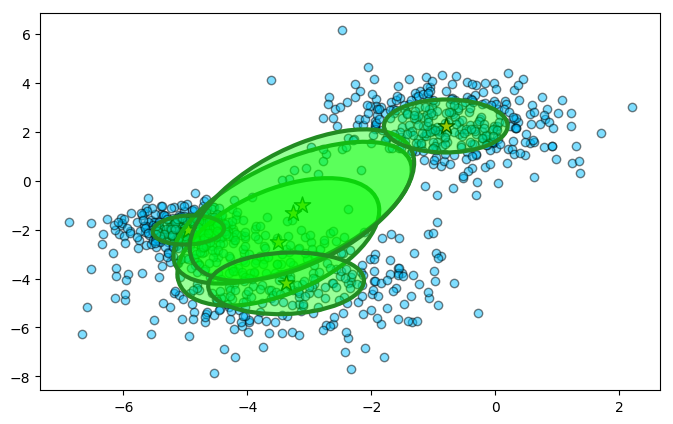

======= 7 =========
# iterations: 48
w: [0.32679097 0.09322866 0.21491658 0.00490677 0.00490677 0.35034347
 0.00490677]
means: [[-0.80364486  2.23973174]
 [-3.34200038 -4.05636118]
 [-3.41633091 -4.1602925 ]
 [-3.26750177 -1.23429771]
 [-3.26775527 -1.22608448]
 [-4.95491728 -2.01130941]
 [-3.26714724 -1.23285185]]
covs: [[[1.002562   0.01071955]
  [0.01071955 1.18205953]]

 [[1.69734706 0.2458218 ]
  [0.2458218  2.47225748]]

 [[1.58478272 0.14725582]
  [0.14725582 1.56546073]]

 [[3.65588793 3.36261998]
  [3.36261998 8.62114199]]

 [[3.6520898  3.36327358]
  [3.36327358 8.67407506]]

 [[0.32815566 0.03735068]
  [0.03735068 0.35481845]]

 [[3.65449824 3.36239061]
  [3.36239061 8.6288902 ]]]


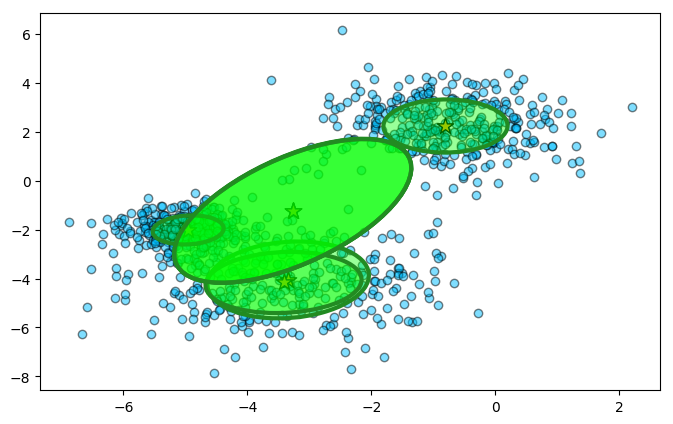

======= 8 =========
# iterations: 49
w: [0.00587084 0.35225049 0.00489237 0.32485323 0.00489237 0.00489237
 0.29745597 0.00489237]
means: [[-3.1566395  -0.79372667]
 [-4.94516617 -2.0104253 ]
 [-3.27642814 -1.31780458]
 [-0.79788414  2.2333165 ]
 [-3.27652928 -1.3197609 ]
 [-3.27650418 -1.31998782]
 [-3.38463385 -4.19303759]
 [-3.2758872  -1.31973772]]
covs: [[[ 3.19971487  3.16503795]
  [ 3.16503795 10.7090608 ]]

 [[ 0.33070304  0.03641711]
  [ 0.03641711  0.35542961]]

 [[ 3.70247674  3.36117269]
  [ 3.36117269  8.24129674]]

 [[ 0.9943325   0.015263  ]
  [ 0.015263    1.16888145]]

 [[ 3.70289526  3.36078827]
  [ 3.36078827  8.22959276]]

 [[ 3.70301302  3.36079299]
  [ 3.36079299  8.22824351]]

 [[ 1.58693225  0.14906499]
  [ 0.14906499  1.616527  ]]

 [[ 3.70253749  3.35966045]
  [ 3.35966045  8.22597736]]]


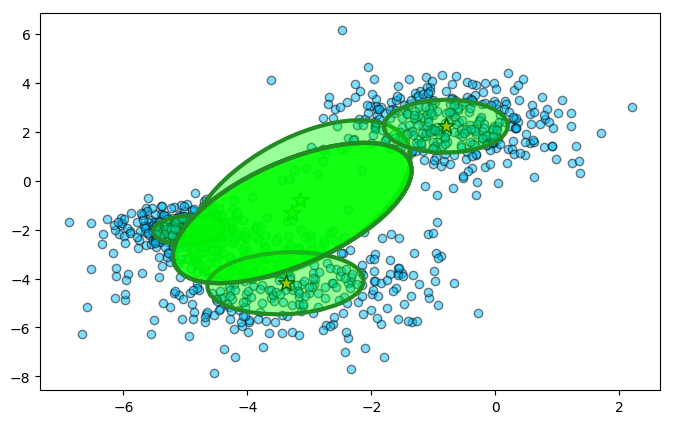

======= 9 =========
# iterations: 30
w: [0.00684932 0.32387476 0.35127202 0.29843444 0.00391389 0.00391389
 0.00391389 0.00391389 0.00391389]
means: [[-3.51655773 -0.66465989]
 [-0.79806048  2.23577696]
 [-4.95670366 -2.01515464]
 [-3.37504144 -4.18090879]
 [-3.51304035 -1.43114227]
 [-3.51302242 -1.43119458]
 [-3.51300439 -1.43124658]
 [-3.51298637 -1.43129851]
 [-3.5129683  -1.43135018]]
covs: [[[ 3.32460423  3.38488578]
  [ 3.38488578 12.71556305]]

 [[ 0.9939564   0.02114879]
  [ 0.02114879  1.16414474]]

 [[ 0.33051315  0.03727098]
  [ 0.03727098  0.35689657]]

 [[ 1.57788458  0.15005092]
  [ 0.15005092  1.61731315]]

 [[ 4.23879021  3.74246046]
  [ 3.74246046  8.78026397]]

 [[ 4.23879223  3.74244868]
  [ 3.74244868  8.77991926]]

 [[ 4.23879396  3.74243679]
  [ 3.74243679  8.77957692]]

 [[ 4.23879572  3.74242496]
  [ 3.74242496  8.7792349 ]]

 [[ 4.23879733  3.7424131 ]
  [ 3.7424131   8.77889428]]]


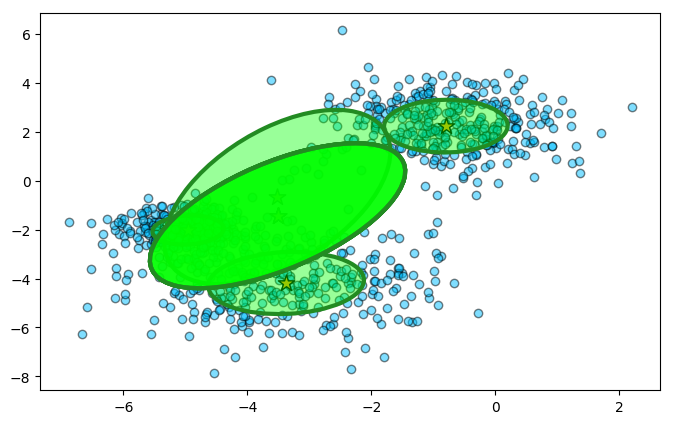

======= 10 =========
# iterations: 50
w: [0.00488281 0.00488281 0.00488281 0.00390625 0.3515625  0.32226562
 0.27734375 0.00488281 0.02050781 0.00488281]
means: [[-3.22229656 -1.3100584 ]
 [-3.22226673 -1.3101393 ]
 [-3.22223469 -1.31018906]
 [-3.48204668 -1.3829645 ]
 [-4.94549829 -2.01321185]
 [-0.79597222  2.24806381]
 [-3.36854876 -4.19689449]
 [-3.21805551 -1.2862833 ]
 [-3.59466673 -3.4209162 ]
 [-3.22021022 -1.30871188]]
covs: [[[3.68165160e+00 3.36211641e+00]
  [3.36211641e+00 8.35357406e+00]]

 [[3.68167860e+00 3.36208375e+00]
  [3.36208375e+00 8.35296319e+00]]

 [[3.68168476e+00 3.36204791e+00]
  [3.36204791e+00 8.35254815e+00]]

 [[4.20087532e+00 3.75324883e+00]
  [3.75324883e+00 9.16742099e+00]]

 [[3.29943369e-01 3.57752014e-02]
  [3.57752014e-02 3.56497107e-01]]

 [[9.89537493e-01 2.10228447e-03]
  [2.10228447e-03 1.16905512e+00]]

 [[1.56147149e+00 1.39599706e-01]
  [1.39599706e-01 1.54125085e+00]]

 [[3.66425506e+00 3.35569169e+00]
  [3.35569169e+00 8.40965277e+00]]

 [

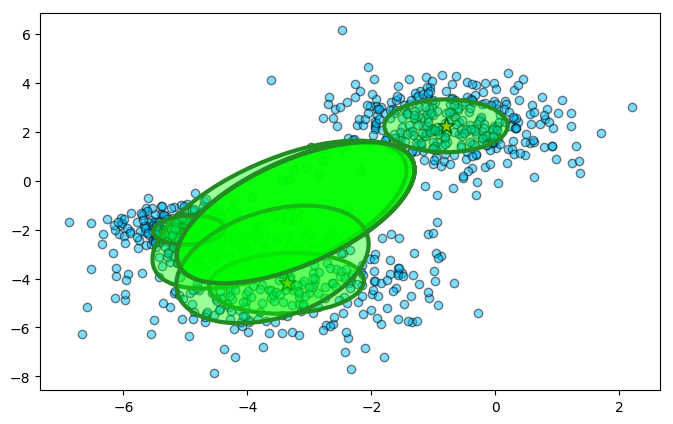

argmin_k: 3, min_kl: 2601.628845794432


In [7]:
k_range = np.arange(1,10+1)
kls, argmin_k = cluster_number_selection_by_kl(x, k_range, plot=True)

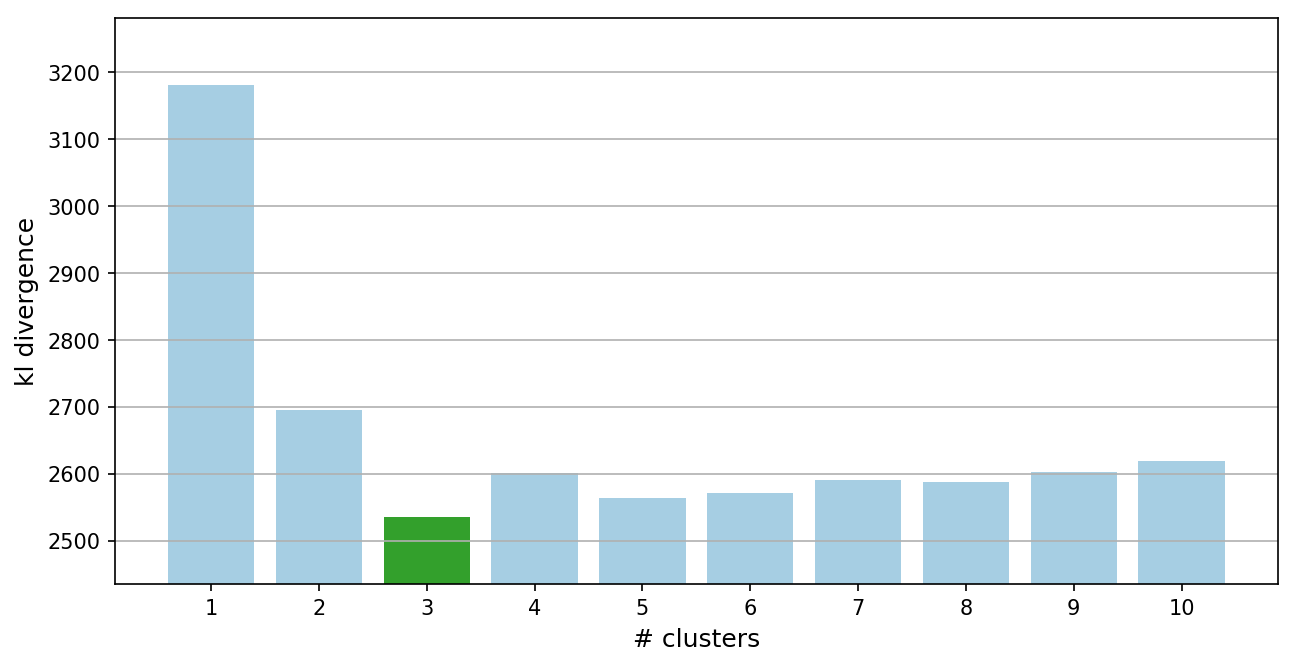

In [8]:
k_range_0 = k_range - 1
colors = plt.cm.Paired([0,3])

plt.figure(figsize=(10,5), dpi=150)
for k in k_range_0:
    g = 1 if k+1 == argmin_k else 0
    plt.bar(k, kls[k], color=colors[g])

plt.xticks(k_range_0, k_range)
plt.grid(axis='y')
plt.ylim(kls.min()-100, kls.max()+100)
plt.ylabel('kl divergence', fontsize=12)
plt.xlabel('# clusters', fontsize=12)
plt.show()